In [1]:
%load_ext autoreload
%autoreload 2
import driftmlp

import driftmlp.shortest_path as SP 
from driftmlp.drifter_indexing.discrete_system import h3_default
import pickle

import numpy as np
### Visualization
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib.ticker as mticker

from shapely.geometry import Point

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
loc1 = 149, -40
loc2 = -74.8, -53
if 'nets' not in locals():
    nets = pickle.load(open('rotations_100_3_10.p', 'rb'))
    
def add_rare_gridlines(ax):
    ##Gridlines to match the other papers grid lines 
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.left_labels = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([140,  -175,-145, -105, -65])
    gl.ylocator = mticker.FixedLocator([0,-20,-40,-60,-80])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

def path_and_df(network, original_gpd):
    indices = driftmlp.helpers.return_h3_inds(origins, rot=network['rotation'])
    paths = [driftmlp.shortest_path.get_all_paths(network, src, indices) for src in  indices]
    ##We didn't store all the gpd dataframes originally as its' costly memorywise
    rot = network['rotation']
    h3_df = driftmlp.plotting.make_h3_gpd.network_to_multipolygon_df(network)
    return {'paths':paths, 'gpd':h3_df, 'rot':rot}


def get_singleSP(net, loc1, loc2, res=3):
    discretizer = h3_default(res=res, rot=net['rotation'])
    return SP.SingleSP(net, loc1, loc2, discretizer=discretizer)

# Rare long-distance dispersal of marine angiosperm across the pacific Ocean
## Figure 2 of their paper reproduction with the most likely path methodology

In [2]:
if 'nets_4' not in locals():
    nets_4 = pickle.load(open('rotations_30_4_10.p', 'rb'))
    nets_append = pickle.load(open('rotations_30_4_55.p', 'rb'))
    nets_4 = nets_4+nets_append


## Plot everything together for the Supplementary Info

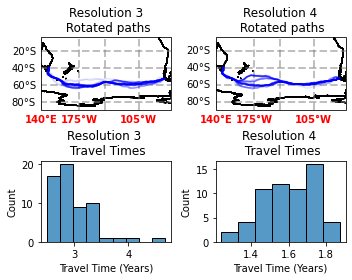

In [3]:
fig = plt.figure(figsize=(5,4))
sps_res4 = [get_singleSP(net, loc1, loc2,res=4) for net in nets_4]
tt_res4 = [path.sp.travel_time for path in sps_res4]
tt_res4 = [x/365 for x in tt_res4 if x!=-1]

sps_res3 = [get_singleSP(net, loc1, loc2,res=3) for net in nets]
tt_res3 = [path.sp.travel_time for path in sps_res3]
tt_res3 = [x/365 for x in tt_res3 if x!=-1]

ax_res3 = fig.add_subplot(2,2,1, projection=ccrs.PlateCarree(central_longitude=180))
ax_res4 = fig.add_subplot(2,2,2, projection=ccrs.PlateCarree(central_longitude=180))
ax_res3.set_title("Resolution 3\n Rotated paths")
ax_res4.set_title("Resolution 4\n Rotated paths")
ax_res3_tt = fig.add_subplot(2,2,3)
ax_res4_tt = fig.add_subplot(2,2,4)
ax_res3_tt.set_title("Resolution 3 \n Travel Times")
ax_res4_tt.set_title("Resolution 4 \n Travel Times")
ax_res3_tt.set_ylabel("Count")
ax_res3_tt.set_xlabel("Travel Time (Years)")
ax_res4_tt.set_xlabel("Travel Time (Years)")

sns.histplot(np.array(tt_res4), ax=ax_res4_tt)
sns.histplot(np.array(tt_res3[:60]), ax=ax_res3_tt)
for k in sps_res4:
    k.plot_cartopy(rev=False, ax=ax_res4, type_plot='line', alpha=0.1, crs=ccrs.Geodetic())
for k in sps_res3[:60]:
    k.plot_cartopy(rev=False, ax=ax_res3, type_plot='line', alpha=0.1, crs=ccrs.Geodetic())
add_rare_gridlines(ax_res4)
add_rare_gridlines(ax_res3)
fig.tight_layout()
fig.savefig("Images/Comparison_Pacific.png", dpi=300)